In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
id_test = test["id"]
test = test.drop("id", axis=1)

In [ ]:
def new_feature(df):
    df['family_size'] = df['no_of_adults'] + df['no_of_children']
    df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
    df['total_bookings'] = df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled']
   
    return df

train = new_feature(train)
test = new_feature(test)





In [ ]:
train.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,family_size,total_nights,total_bookings
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,...,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,...,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019,2.061805,3.282637,0.195487
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,...,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207,0.680604,1.815918,1.894389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,...,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,...,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000,2.000000,4.000000,0.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,...,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,11.000000,23.000000,64.000000


In [ ]:
train = train.drop(['id'],axis=1)

In [ ]:
print("0 in family_size:", (train['family_size']== 0).sum())
print("0 in family_size:", (train['total_nights']== 0).sum())
train=train.drop(train[train['family_size']==0].index)
train=train.drop(train[train['total_nights']==0].index)



0 in family_size: 16
0 in family_size: 114


In [ ]:
train.describe()
X = train.drop(['booking_status'], axis=1)
y = train['booking_status']

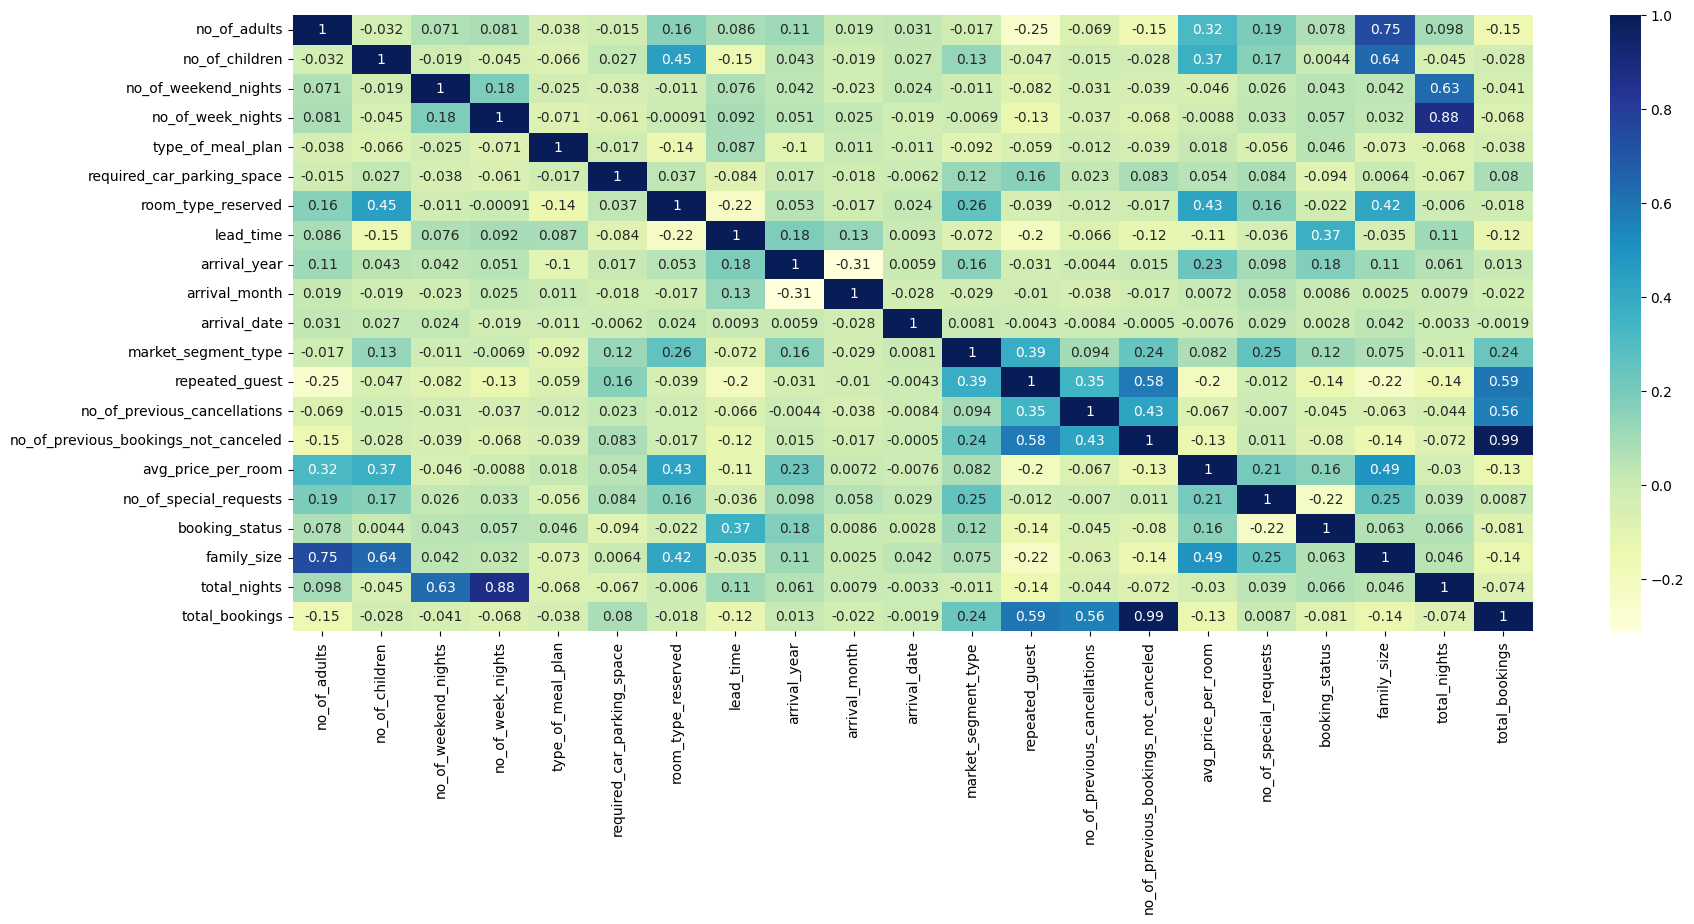

In [ ]:
plt.figure(figsize=(20, 8)) 
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
X.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,family_size,total_nights,total_bookings
count,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000,41970.000000
mean,1.922230,0.141244,0.886919,2.404432,0.238670,0.025304,0.428258,103.899023,2017.856945,7.589969,15.906886,0.726590,0.029068,0.019609,0.175101,104.759271,0.571408,2.063474,3.291351,0.194711
std,0.523465,0.450264,0.885675,1.423477,0.586899,0.157048,0.831320,80.982820,0.350133,2.828692,8.892449,0.629851,0.168000,0.325362,1.731288,36.921514,0.775044,0.679307,1.810071,1.892793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,2.000000,2.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2.000000,3.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,2.000000,4.000000,0.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,11.000000,23.000000,64.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# from sklearn import preprocessing
# normalizer = preprocessing.Normalizer().fit(X)
# X_norm = normalizer.transform(X)
# test_norm = normalizer.transform(test)
# X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
models = [
    SVC(max_iter=100000000),
    LogisticRegression(max_iter=1000000000),
    XGBClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    ExtraTreesClassifier()
]



In [ ]:
best_model = None
best_score = 0
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)    
    if score > best_score:
        best_model = model
        best_score = score

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Score: {best_score}")


Best Model: XGBClassifier
Best Score: 0.8245572234135493


In [ ]:
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.4f" % accuracy)


Accuracy: 0.8246


In [ ]:
import csv
output_file = 'new_data_predictions_file.csv'
new_data_predictions = best_model.predict(test)
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["id","booking_status"])
    for id_value, pre in zip(id_test, new_data_predictions):
        writer.writerow([id_value, pre])
      
